## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

### Скрипт *get_elections.py*



### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("election_data.csv").drop(columns="Unnamed: 0")

In [7]:
df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


In [8]:
df["Всего биллютеней"] = df["Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"] + df["Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"]


> явку (%) по всем ТИК



In [9]:
df["Явка"] = df["Всего биллютеней"] / df["Число избирателей, внесенных в список избирателей на момент окончания голосования"]

> результат отсортировать по убыванию

In [10]:
df.sort_values("Явка", ascending=False, inplace=True)
df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего биллютеней,Явка
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.0
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.0
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.0
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.0
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.0


> выберите произвольного кандидата и найдите тот избиратльный участок, 

In [ ]:
df["Беглов %"] = -1

In [11]:
df.loc[df["Всего биллютеней"] >= 100, "Беглов %"] = np.around(df["Беглов Александр Дмитриевич"] / df["Всего биллютеней"], 2)

In [12]:
df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего биллютеней,Явка,Беглов %
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.0,0.7
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.0,0.7
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.0,0.7
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.0,NaN
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.0,0.9


> на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)

In [21]:
df[df['Беглов %'] == df['Беглов %'].max()]

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего биллютеней,Явка,Беглов %
1453,Территориальная избирательная комиссия №22,УИК №403,668,1000,68,600,332,600,68,3,665,0,0,6,652,7,668,1.000000,0.98
1395,Территориальная избирательная комиссия №22,УИК №343,3537,4000,3523,0,477,0,3523,0,3523,0,0,23,3451,49,3523,0.996042,0.98


> найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [22]:
(df.groupby("tik_name")["Явка"].max() - df.groupby("tik_name")["Явка"].min()).sort_values()

tik_name
Территориальная избирательная комиссия №25    0.158715
Территориальная избирательная комиссия №12    0.328265
Территориальная избирательная комиссия №14    0.338567
Территориальная избирательная комиссия №6     0.419000
Территориальная избирательная комиссия №9     0.487510
Территориальная избирательная комиссия №10    0.555662
Территориальная избирательная комиссия №7     0.634323
Территориальная избирательная комиссия №3     0.659203
Территориальная избирательная комиссия №15    0.707452
Территориальная избирательная комиссия №24    0.716071
Территориальная избирательная комиссия №16    0.727179
Территориальная избирательная комиссия №18    0.741768
Территориальная избирательная комиссия №13    0.745692
Территориальная избирательная комиссия №30    0.746789
Территориальная избирательная комиссия №1     0.770264
Территориальная избирательная комиссия №29    0.788658
Территориальная избирательная комиссия №22    0.790130
Территориальная избирательная комиссия №23    0.792554
Т

> посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)

In [23]:
df.groupby("tik_name")["Явка"].var().sort_values()

tik_name
Территориальная избирательная комиссия №25    0.000844
Территориальная избирательная комиссия №6     0.002043
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №7     0.006799
Территориальная избирательная комиссия №3     0.007303
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №9     0.011464
Территориальная избирательная комиссия №5     0.013666
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №27    0.020655
Территориальная избирательная комиссия №26    0.022018
Территориальная избирательная комиссия №4     0.022297
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №11    0.024049
Т

> для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [25]:
df["Амосов %"] = -1
df.loc[df["Всего биллютеней"] >= 100, "Амосов %"] = np.around(df["Амосов Михаил Иванович"] / df["Всего биллютеней"], 2)

df["Тихонова %"] = -1
df.loc[df["Всего биллютеней"] >= 100, "Тихонова %"] = np.around(df["Тихонова Надежда Геннадьевна"] / df["Всего биллютеней"], 2)

df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего биллютеней,Явка,Беглов %,Амосов %,Тихонова %
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.0,0.7,0.10,0.15
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.0,0.7,0.08,0.17
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.0,0.7,0.07,0.18
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.0,NaN,-1.00,-1.00
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.0,0.9,0.10,0.00


In [28]:
counts = [
          df.groupby("Беглов %").count()["uik_name"],
          df.groupby("Амосов %").count()["uik_name"],
          df.groupby("Тихонова %").count()["uik_name"]
]

for d in counts:
  for percent, count in zip(d.index, d):
    print(f"{percent}: {count}")
  print('\n')

0.3: 1
0.32: 1
0.33: 2
0.38: 3
0.39: 3
0.4: 3
0.41: 5
0.42: 3
0.43: 3
0.44: 8
0.45: 8
0.46: 10
0.47: 20
0.48: 14
0.49: 24
0.5: 27
0.51: 37
0.52: 37
0.53: 44
0.54: 36
0.55: 52
0.56: 62
0.57: 68
0.58: 77
0.59: 79
0.6: 122
0.61: 93
0.62: 92
0.63: 96
0.64: 89
0.65: 79
0.66: 82
0.67: 73
0.68: 77
0.69: 61
0.7: 72
0.71: 48
0.72: 53
0.73: 40
0.74: 37
0.75: 37
0.76: 28
0.77: 21
0.78: 19
0.79: 20
0.8: 20
0.81: 24
0.82: 13
0.83: 14
0.84: 14
0.85: 9
0.86: 7
0.87: 7
0.88: 5
0.89: 5
0.9: 6
0.91: 6
0.92: 2
0.93: 1
0.94: 3
0.95: 1
0.96: 1
0.98: 2


-1.0: 15
0.01: 6
0.02: 6
0.03: 2
0.04: 13
0.05: 17
0.06: 23
0.07: 35
0.08: 47
0.09: 68
0.1: 89
0.11: 98
0.12: 116
0.13: 130
0.14: 129
0.15: 160
0.16: 153
0.17: 151
0.18: 126
0.19: 100
0.2: 89
0.21: 82
0.22: 76
0.23: 44
0.24: 56
0.25: 40
0.26: 44
0.27: 26
0.28: 26
0.29: 17
0.3: 15
0.31: 5
0.32: 6
0.33: 4
0.34: 1
0.35: 3
0.36: 2
0.42: 1


-1.0: 15
0.0: 1
0.01: 4
0.02: 5
0.03: 11
0.04: 8
0.05: 14
0.06: 21
0.07: 22
0.08: 35
0.09: 43
0.1: 46
0.11: 51
0.12: 67
0.

> визуализируйте отношение - явка на УИК  →  результат кандидата.

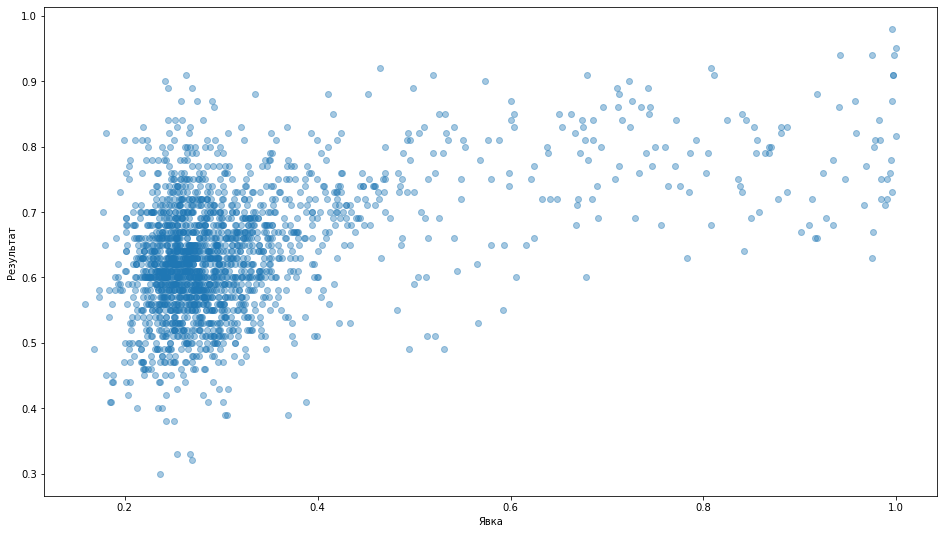

In [32]:
import matplotlib.pyplot as plt


buf = df.loc[df["Беглов %"] != -1].groupby("Явка")["Беглов %"].mean()


x = buf.index
y = buf.values

plt.figure(figsize=(16, 9))
plt.scatter(x, y, alpha=0.4)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()